Regressão linear

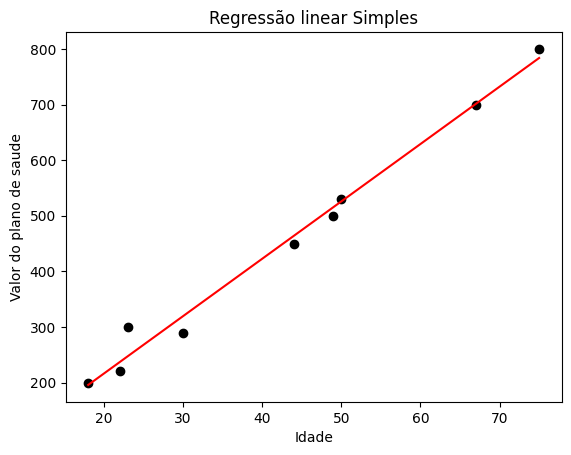


 previsao1 [598.04347826]

 previsao2 [598.04347826]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dados = {'Valor' : [200,220,300,290,450,500,530,700,800],
         'Idade' : [18,22,23,30,44,49,50,67,75]}

dados = pd.DataFrame(data=dados)

X = dados['Idade'].values
Y = dados['Valor'].values

#Função para usar o X transposto
X = X.reshape(-1,1)

#Definindo o regressor Linear
regressor = LinearRegression()

#Passando os dados para treinar o regressor
regressor.fit(X,Y)

#Visualizar grafico
plt.scatter(X,Y, color = 'black')
plt.plot(X, regressor.predict(X), color ='red')
plt.title("Regressão linear Simples")
plt.xlabel("Idade")
plt.ylabel('Valor do plano de saude')
plt.show()

#prevendo novos valores
idade = np.array(57)
#duas maneiras de passar os valores para a função foi ajustada
previsao1 = regressor.predict(idade.reshape(-1,1))
previsao2 = regressor.intercept_ + regressor.coef_*idade

print("\n previsao1", previsao1)
print("\n previsao2", previsao2)

Exemplo de valor de imóvel

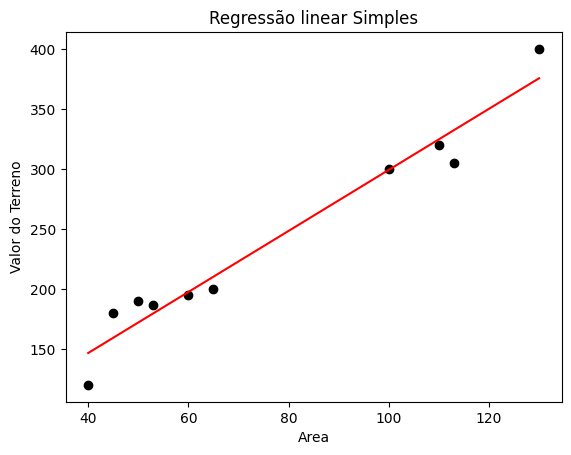

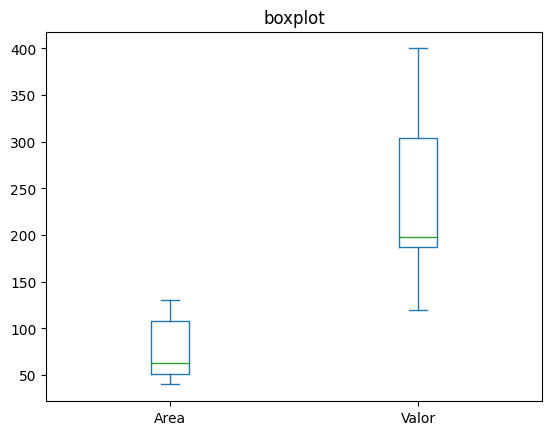


 previsao1 [133.86413463]

 previsao2 [222.9087329]

 previsao2 [528.2044984]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dados = {"Area":[40,45,50,53,60,65,100,110,113,130],
        "Valor": [120,180,190,187,195,200,300,320,305,400]}

dados = pd.DataFrame(data=dados)

X = dados['Area'].values
Y = dados['Valor'].values

#Função para usar o X transposto
X = X.reshape(-1,1)

#Definindo o regressor Linear
regressor = LinearRegression()

#Passando os dados para treinar o regressor
regressor.fit(X,Y)

#Visualizar grafico
plt.scatter(X,Y, color = 'black')
plt.plot(X, regressor.predict(X), color ='red')
plt.title("Regressão linear Simples")
plt.xlabel("Area")
plt.ylabel('Valor do Terreno')
plt.show()

boxplot = dados[['Area', 'Valor']].plot(kind='box', title='boxplot')
plt.show()

#prevendo novos valores
area1 = np.array(35)
area2 = np.array(70)
area3 = np.array(190)
#duas maneiras de passar os valores para a função foi ajustada
previsao1 = regressor.predict(area1.reshape(-1,1))
previsao2 = regressor.predict(area2.reshape(-1,1))
previsao3 = regressor.predict(area3.reshape(-1,1))

print("\n previsao1", previsao1)
print("\n previsao2", previsao2)
print("\n previsao2", previsao3)

Naive Bayes

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

dados = {'Tempo': ['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso','Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso'],
         'Umidade': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta','Normal', 'Normal'],
         'Vento': ['Fraco', 'Forte', 'Fraco','Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Fraco'],
         'Treinou': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim','Sim']}

dados = pd.DataFrame(data=dados)

#Criando labelEncoder
Tempo = preprocessing.LabelEncoder()
Umidade = preprocessing.LabelEncoder()
Vento = preprocessing.LabelEncoder()
Treinou = preprocessing.LabelEncoder()

#Usando LabelEncoder para atribuir números as variaveis qualitativas
Tempo.fit(dados['Tempo'].unique())
Umidade.fit(dados['Umidade'].unique())
Vento.fit(dados['Vento'].unique())
Treinou.fit(dados['Treinou'].unique())

#Transformando dataset de variaveis qualitativas para variaveis qualitativas
dados['Tempo'] = Tempo.transform(dados['Tempo'])
dados['Umidade'] = Umidade.transform(dados['Umidade'])
dados['Vento'] = Vento.transform(dados['Vento'])
dados['Treinou'] = Treinou.transform(dados['Treinou'])

#Separando nosso dataset nos atributos previsores e na classe objetivo
previsor = dados[['Tempo','Umidade','Vento']]
classe = dados['Treinou']

#criando o classificado NaiveBayes
gnb = GaussianNB()
gnb.fit(previsor, classe)

#Verificando a precisao
print("Precisão =", gnb.score(previsor, classe)*100,"%")


#Realizando teste
previsao = {'Tempo': ['Ensolarado', 'Nublado', 'Nublado', 'Chuvoso'],
'Umidade' : ['Normal', 'Alta', 'Normal', 'Alta'],
'Vento': ['Forte', 'Forte', 'Fraco', 'Forte']}

previsao = pd.DataFrame(data=previsao)

previsao['Tempo'] = Tempo.transform(previsao['Tempo'])
previsao['Umidade'] = Umidade.transform(previsao['Umidade'])
previsao['Vento'] = Vento.transform(previsao['Vento'])

print(gnb.predict(previsao))
print(Treinou.inverse_transform(gnb.predict(previsao)))
print(gnb.predict_proba(previsao))

Precisão = 90.0 %
[0 1 1 0]
['Não' 'Sim' 'Sim' 'Não']
[[0.6715144  0.3284856 ]
 [0.40756566 0.59243434]
 [0.00771096 0.99228904]
 [0.86747732 0.13252268]]


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

dados = {'Renda': ['Alta', 'Média', 'Média', 'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Alta', 'Baixa', 'Media'],
         'Idade': ['Jovem', 'Idoso', 'Adulto', 'Adulto', 'Adulto', 'Idoso', 'Jovem', 'Jovem', 'Jovem', 'Jovem'],
         'Valor_Empréstimo': ['Alto', 'Alto', 'Médio','Médio', 'Médio', 'Baixo', 'Alto', 'Médio', 'Baixo', 'Baixo'],
         'Emprestou': ['Sim', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim']}

dados = pd.DataFrame(data=dados)

#Criando labelEncoder
Renda = preprocessing.LabelEncoder()
Idade = preprocessing.LabelEncoder()
Valor_Empréstimo = preprocessing.LabelEncoder()
Emprestou = preprocessing.LabelEncoder()

#Usando LabelEncoder para atribuir números as variaveis qualitativas
Renda.fit(dados['Renda'].unique())
Idade.fit(dados['Idade'].unique())
Valor_Empréstimo.fit(dados['Valor_Empréstimo'].unique())
Emprestou.fit(dados['Emprestou'].unique())

#Transformando dataset de variaveis qualitativas para variaveis qualitativas
dados['Renda'] = Renda.transform(dados['Renda'])
dados['Idade'] = Idade.transform(dados['Idade'])
dados['Valor_Empréstimo'] = Valor_Empréstimo.transform(dados['Valor_Empréstimo'])
dados['Emprestou'] = Emprestou.transform(dados['Emprestou'])

#Separando nosso dataset nos atributos previsores e na classe objetivo
previsor = dados[['Renda','Idade','Valor_Empréstimo']]
classe = dados['Emprestou']

#criando o classificado NaiveBayes
gnb = GaussianNB()
gnb.fit(previsor, classe)

#Verificando a precisao
print("Precisão =", gnb.score(previsor, classe)*100,"%")

# #Realizando teste
# previsao = {'Tempo': ['Ensolarado', 'Nublado', 'Nublado', 'Chuvoso'],
# 'Umidade' : ['Normal', 'Alta', 'Normal', 'Alta'],
# 'Vento': ['Forte', 'Forte', 'Fraco', 'Forte']}

# previsao = pd.DataFrame(data=previsao)

# previsao['Tempo'] = Tempo.transform(previsao['Tempo'])
# previsao['Umidade'] = Umidade.transform(previsao['Umidade'])
# previsao['Vento'] = Vento.transform(previsao['Vento'])

# print(gnb.predict(previsao))
# print(Treinou.inverse_transform(gnb.predict(previsao)))
# print(gnb.predict_proba(previsao))

Precisão = 80.0 %
